In [1]:
# Calculate bioprinted cell viability

In [2]:
import matplotlib.pyplot as plt; 
import numpy as np; 
import csv;
import os;

In [3]:
# Variable lists

csv_countess_filenames = ["0_0", "P0_0", "P1.5_0", "P3.0_0", "P5.5_0", "P10.0_0"];
sample_names = ["Unprinted", "0 psi", "1.5 psi", "3.0 psi", "5.5 psi", "10.0 psi"];
dispensing_pressure = [0,0,1.5,3,5.5,10];
analysis_type = ["Total Count of ", "PDF of ", "CDF of "];
data_type = ["Viable", "Dead"];

color_live_dead = [[.6, .8, .7],[.8, .6, .6]];
c1 = 0.2; c2 = 0.6; 
color_pressures = [[c2, c2, c2], [c1, c1, c1], [c1, c2, c1], [c1, c1, c2], [c2, c1, c2], [c1, c2, c2]];


In [4]:
def find_percentage_each_cell_size(size, viable, dead, total):
    
    total_viable = sum(viable)
    total_dead = sum(dead)
    total_total = sum(total)
    
    for i in range(len(viable)):
        viable[i] = viable[i]/total_viable
        dead[i] = dead[i]/total_dead
        total[i] = total[i]/total_viable
    
    return(viable, dead, total)
    

In [5]:
# Calculate the CFD from PDF 
def cdf_from_pdf_cell_size(viable, dead, total):
    
    cfd_viable = []; cfd_dead = []; cfd_total = []; 
    for i in range(len(viable)):
        cfd_viable.append(0);
        cfd_dead.append(0);
        cfd_total.append(0);
        
    for i in range(len(viable)):
        cfd_viable[i] = sum(viable[0:i])
        cfd_dead[i] = sum(viable[0:i])
        cfd_total[i] = sum(viable[0:i])
        
    return(cfd_viable, cfd_dead, cfd_total)
       

In [6]:
# Make tables of CDC data for each cancer type, for each data type
def parse_csv_countess(filename, analysis_type):
    replicate_suffix_list = ["_A", "_B"];
    
    for suffix in range(len(replicate_suffix_list)):
        
        # Build filename to look in the Data archive
        file = os.path.join("Data saved to csv", filename + replicate_suffix_list[suffix] + ".csv")
        
        # Open CDC files and read in all lines
        data = [];
        f = open(file,'r')
        for line in f: data.append(line)
        f.close() 
        
        # Build the list
        if suffix == 0:
            size = []; viable = []; dead = []; total = [];
            for data_row in range(len(data)):
                size.append(0); viable.append(0); dead.append(0); total.append(0);
        
        x = [0, 0, 0, 0]; 
        for i in range(len(data)):
            x = data[i].split(",")
            if i > 0: 
                size[i] = size[i]+int(x[0]);
                viable[i] = viable[i]+int(x[1]);
                dead[i] = dead[i] +int(x[2]);
                total[i] = total[i]+int(x[3]);
                
    if analysis_type == "PDF of ":
        viable, dead, total = find_percentage_each_cell_size(size, viable, dead, total)  
        
    if analysis_type == "CDF of ": 
        viable, dead, total = find_percentage_each_cell_size(size, viable, dead, total)      
        viable, dead, total = cdf_from_pdf_cell_size(viable, dead, total)
                
    return(size, viable, dead, total)


In [7]:
def pdf_cell_size(csv_countess_filenames, sample_names, title, data_type, analysis_type, color_pressures):

    for i in range(len(csv_countess_filenames)):
        size, viable, dead, total = parse_csv_countess(csv_countess_filenames[i], analysis_type)
        
        if data_type == "Viable": 
            plt.scatter(size,viable, edgecolors = color_pressures[i], color = "none", s=50)
            plt.plot(size, viable, color = color_pressures[i], linestyle="-")
            
        if data_type == "Dead": 
            plt.scatter(size,dead, edgecolors = color_pressures[i], color = "none", s=50)
            plt.plot(size, dead, color = color_pressures[i], linestyle="-")
    
    plt.title(title)
    plt.xlabel(data_type + ' Cell Diameter (um)'); 
    plt.xlim((5,35))
        
    if analysis_type == "Total Count of ": 
        plt.ylabel('Cell Count');
        
    if analysis_type == "PDF of ": 
        plt.ylabel('Cells with Given Diameter / Cells Total'); 
    
    if analysis_type == "CDF of ": 
        plt.ylabel('Cells of Given Diameter or Smaller / Cells Total'); 
    
    if analysis_type == "CDF of ":
        plt.legend(sample_names,loc='upper left')


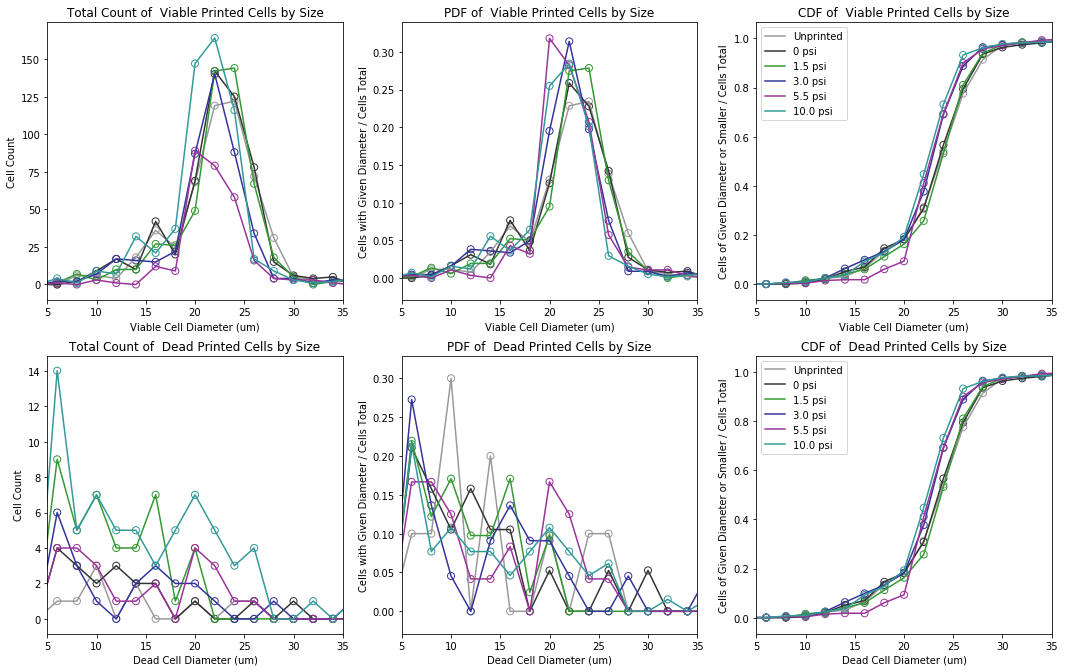

In [8]:
# Make the figure of total count, pdf and cdf for viable and dead cell diameter
       
box_size = 4.5; fig = plt.figure(1, figsize=(4*box_size, 2.5*box_size)); plot_number = 230;
   
for j in range(len(data_type)):
    for i in range(len(analysis_type)):   
        plot_number = plot_number+1;  
        ax = fig.add_subplot(plot_number);
        pdf_cell_size(csv_countess_filenames, sample_names, analysis_type[i] + " " + data_type[j] +" Printed Cells by Size", data_type[j], analysis_type[i], color_pressures)
    
filename = os.path.join("Figures" , "PDF and CDF of Cell Diameter" + '.jpg')
plt.savefig(filename, bbox_inches='tight') 
plt.show()

In [9]:
# Calculate the percentage cells viale and dead from parced csv function
def percentage_cells(csv_countess_filenames, analysis_type):
    
    viable_percent = []; 
    dead_percent = []; 
    total_percent = []; 
    
    for i in range(len(csv_countess_filenames)):
        size, viable, dead, total = parse_csv_countess(csv_countess_filenames[i], analysis_type)
    
        viable_percent.append(sum(viable)/sum(total))
        dead_percent.append(sum(dead)/sum(total))  
        total_percent.append(sum(total)/sum(total)) 
    
    return(viable_percent, dead_percent, total_percent)
    

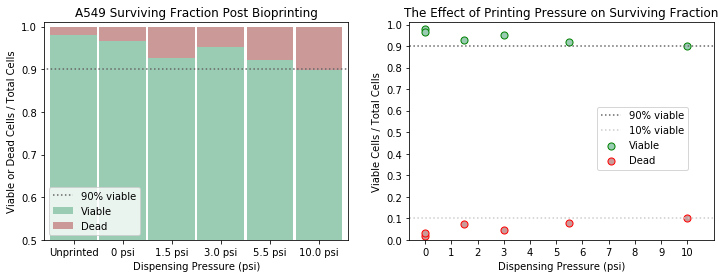

In [10]:
viable_percent, dead_percent, total_percent = percentage_cells(csv_countess_filenames, analysis_type[0])

box_size = 4; fig = plt.figure(1, figsize=(3*box_size, 1*box_size)); plot_number = 120;

plot_number = plot_number+1;  
ax = fig.add_subplot(plot_number);
plt.bar([0,1,2,3,4,5], viable_percent, width=.95, color=color_live_dead[0], label=data_type[0])
plt.bar([0,1,2,3,4,5], dead_percent, width=.95, color=color_live_dead[1], bottom=viable_percent, label=data_type[1])
number = 0.9; plt.plot([-10,1,2,3,4,50], [number,number,number,number,number,number], color=[.4, .4, .4], linestyle=":", label="90% viable")

plt.xticks(range(len(viable_percent)), sample_names, rotation=0, horizontalalignment='center',)

plt.title("A549 Surviving Fraction Post Bioprinting")
plt.xlabel("Dispensing Pressure (psi)"); plt.xlim((-0.6,5.6))
plt.ylabel("Viable or Dead Cells / Total Cells"); plt.ylim((0.5,1.01)); plt.yticks(np.arange(.5, 1.05, 0.1));
plt.legend(loc='lower left')

plot_number = plot_number+1;  
ax = fig.add_subplot(plot_number);
plt.scatter(dispensing_pressure, viable_percent, color=color_live_dead[0], edgecolors ="green", s=50, label=data_type[0])
plt.scatter(dispensing_pressure, dead_percent, color=color_live_dead[1], edgecolors ="red", s=50, label=data_type[1])
number = 0.9; plt.plot([-10,1,2,3,4,50], [number,number,number,number,number,number], color=[.4, .4, .4], linestyle=":", label="90% viable")
number = 0.1; plt.plot([-10,1,2,3,4,50], [number,number,number,number,number,number], color=[.8, .8, .8], linestyle=":", label="10% viable")

plt.title("The Effect of Printing Pressure on Surviving Fraction")
plt.xlabel("Dispensing Pressure (psi)"); plt.xlim((-0.6,11)); plt.xticks(np.arange(0, 11, 1));
plt.ylabel("Viable Cells / Total Cells"); plt.ylim((0,1.01)); plt.yticks(np.arange(0, 1.05, 0.1));
plt.legend(loc='lower left',bbox_to_anchor=(0.6,0.3))

filename = os.path.join("Figures" , "Surviving Fraction Bar Graph and Scatter Plot" + '.jpg')
plt.savefig(filename, bbox_inches='tight')     
plt.show()
